In [1]:
from pandas import read_csv
from prince import MCA
customer_churn = read_csv('../data/Customer_churn_discrete.csv', index_col="customerID")
labels = customer_churn['Churn']
customer_churn = customer_churn.drop(['Churn'], axis='columns')

In [2]:
mca = MCA(n_components=5)
mca.fit(customer_churn)
mca.explained_inertia_

[0.25897149097259886,
 0.12511322777649816,
 0.08700334937103553,
 0.05163870506288701,
 0.045934632558235586]

In [3]:
from numpy import cumsum
cumsum(mca.explained_inertia_)

array([0.25897149, 0.38408472, 0.47108807, 0.52272677, 0.56866141])

In [4]:
from update import update_csv
update_csv("MCA",mca.explained_inertia_)

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (25.90% inertia)', ylabel='Component 1 (12.51% inertia)'>

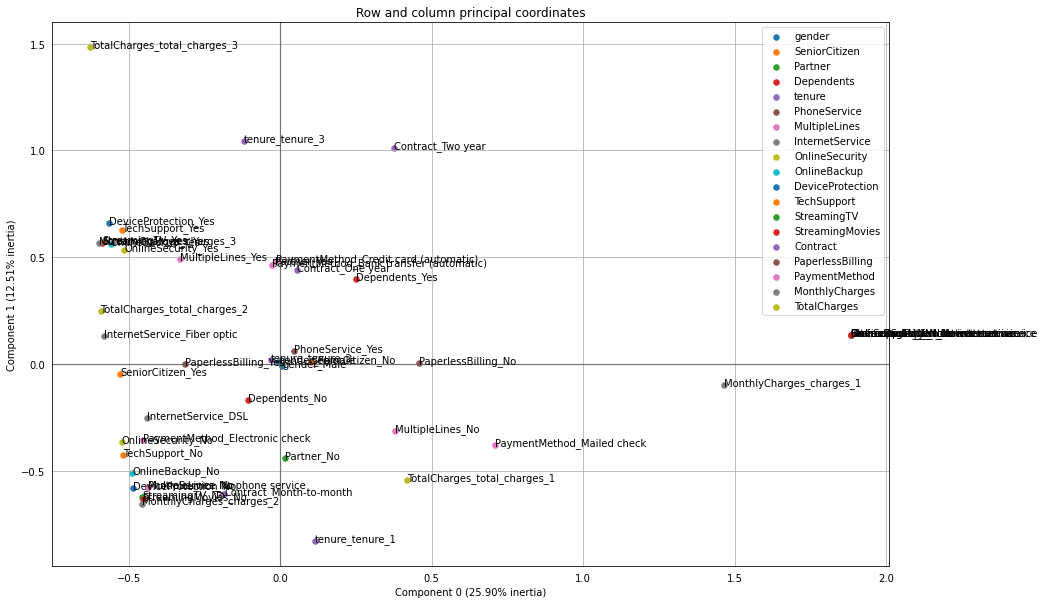

In [5]:
mca.plot_coordinates(customer_churn,figsize=(15, 10),show_row_points=False,show_column_labels=True)

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (25.90% inertia)', ylabel='Component 1 (12.51% inertia)'>

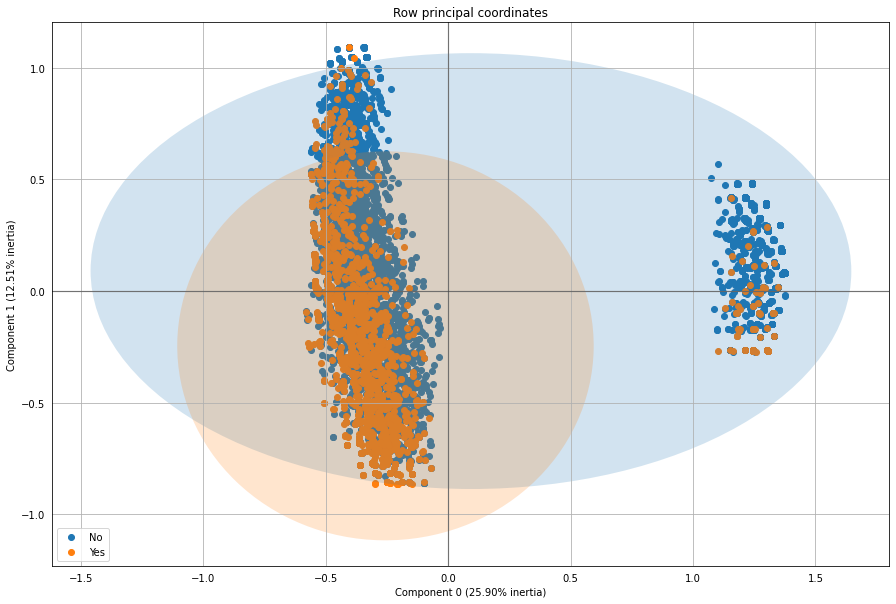

In [6]:
from plotMCA import plot_row_coordinates
plot_row_coordinates(mca.row_coordinates,mca.explained_inertia_,customer_churn,figsize=(15, 10),color_labels=labels)

In [7]:
from update import measure_fit_time,measure_transform_time
measure_fit_time("MCA",lambda x: MCA(n_components=5).fit(x),customer_churn)
prefited_MCA = MCA(n_components=5)
prefited_MCA.fit(customer_churn)
measure_transform_time("MCA",lambda x: prefited_MCA.transform(x),customer_churn)